Notebook ini dibangun menggunakan kaggle kernel, karena data yang sangat besar (15GB) dan resource belum mendukung juga kaggle kernel tidak cukup menangani semua data

Dalam notebook ini hanya memvisualisasi 1000 data pertama, belum sampai pada tahap modelling.

In [21]:
!pip install python_speech_features

  Stored in directory: /Users/fahmisalman/Library/Caches/pip/wheels/3c/42/7c/f60e9d1b40015cd69b213ad90f7c18a9264cd745b9888134be
Successfully built python-speech-features
You are using pip version 19.0.1, however version 19.2.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
import os
import numpy as np
import pandas as pd
import soundfile as sf
import scipy.signal as signal
import matplotlib.pyplot as plt

In [2]:
train_path = 'dataset/train/'
test_path = 'dataset/test/'

In [3]:
filename = 'de_f_63f5b79c76cf5a1a4bbd1c40f54b166e.fragment1.flac'

In [4]:
data, samplerate = sf.read(train_path+filename)

In [14]:
data
len(data)

220500

In [15]:
samplerate

22050

In [22]:
import librosa
from python_speech_features import mfcc

In [32]:
a = librosa.feature.zero_crossing_rate(data)
print(a, len(a[0]))

[[0.03320312 0.05078125 0.06201172 0.05517578 0.0390625  0.06201172
  0.19677734 0.34619141 0.50146484 0.59667969 0.56982422 0.51123047
  0.36181641 0.23486328 0.13330078 0.09521484 0.16943359 0.23388672
  0.23828125 0.1953125  0.15625    0.10107422 0.10644531 0.11669922
  0.09619141 0.09667969 0.08984375 0.07666016 0.06445312 0.05859375
  0.12353516 0.24658203 0.37841797 0.52392578 0.59912109 0.60546875
  0.52734375 0.44775391 0.38085938 0.34472656 0.35791016 0.3203125
  0.26171875 0.18652344 0.14257812 0.15771484 0.18261719 0.22216797
  0.2578125  0.27148438 0.27734375 0.28173828 0.29101562 0.29785156
  0.29980469 0.28955078 0.26855469 0.26513672 0.25927734 0.23388672
  0.21386719 0.16113281 0.11962891 0.09082031 0.05664062 0.05517578
  0.09130859 0.14013672 0.20654297 0.21484375 0.17089844 0.18212891
  0.19628906 0.26074219 0.34179688 0.36816406 0.37304688 0.31640625
  0.25244141 0.18115234 0.10791016 0.08447266 0.06298828 0.04394531
  0.03417969 0.02783203 0.02539062 0.02490234 0.0

Text(0.5,0,'Time [sec]')

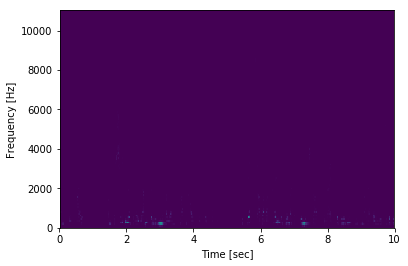

In [7]:
freq, time, Sxx = signal.spectrogram(data, samplerate, scaling='spectrum')
plt.pcolormesh(time, freq, Sxx)

# add axis labels
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

In [ ]:
Pxx, freqs, bins, im = plt.specgram(data, Fs=samplerate)

# add axis labels
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

In [ ]:
data

In [ ]:
plt.plot(data)

Karena resource pada kaggle kernel tidak cukup, maka hanya digunakan 1000 batch data

In [4]:
label = []
for filename in os.listdir(train_path)[:1000]:
    label.append(filename[:2])

In [5]:
gender = []
for filename in os.listdir(train_path)[:1000]:
    gender.append('male' if filename[3:4]=='m' else 'female')

In [6]:
sound_type = []
for filename in os.listdir(train_path)[:1000]:
    sound_type.append('noise' if 'noise' in filename else 'pitch' if 'pitch' in filename else 'speed' if 'speed' in filename else 'notype')

In [7]:
file = []
for filename in os.listdir(train_path)[:1000]:
    file.append(filename)

In [8]:
series = []
length = []
for filename in os.listdir(train_path)[:1000]:
    flac, samplerate = sf.read(train_path+filename)
    series.append(flac)
    length.append(samplerate)

In [9]:
data = {'Gender':gender,
        'filename':file,
           'Sound_type': sound_type,
       'languange':label,
       'series': series,
       'length': length}

In [10]:
df = pd.DataFrame(data)

In [11]:
len(df)

432

In [12]:
df = pd.DataFrame(data)

In [13]:
df.head()

,Gender,filename,Sound_type,languange,series,length
0,female,de_f_63f5b79c76cf5a1a4bbd1c40f54b166e.fragment...,notype,de,"[0.00274658203125, 0.004486083984375, 0.010803...",22050
1,female,de_f_63f5b79c76cf5a1a4bbd1c40f54b166e.fragment...,notype,de,"[0.07891845703125, 0.09246826171875, 0.1100769...",22050
2,female,de_f_63f5b79c76cf5a1a4bbd1c40f54b166e.fragment...,notype,de,"[-0.007354736328125, -0.007415771484375, -0.00...",22050
3,female,de_f_63f5b79c76cf5a1a4bbd1c40f54b166e.fragment...,notype,de,"[0.038848876953125, 0.04473876953125, 0.055511...",22050
4,female,de_f_63f5b79c76cf5a1a4bbd1c40f54b166e.fragment...,notype,de,"[0.000335693359375, -0.000244140625, 0.0032043...",22050


In [14]:
x_train = df['series']
y_train = df['languange']
b = df['languange']

In [15]:
x_train = np.array(x_train)

In [16]:
a = np.zeros((len(x_train), 1000))

In [17]:
for i in range(len(a)):
    a[i] = x_train[i][:1000]

In [18]:
a

array([[ 0.00274658,  0.00448608,  0.01080322, ..., -0.00057983,
         0.02496338,  0.05450439],
       [ 0.07891846,  0.09246826,  0.1100769 , ..., -0.07400513,
        -0.05255127, -0.01953125],
       [-0.00735474, -0.00741577, -0.00924683, ..., -0.00418091,
         0.00204468,  0.01089478],
       ...,
       [ 0.00598145,  0.00262451, -0.0020752 , ..., -0.01837158,
        -0.02456665, -0.02523804],
       [ 0.02252197,  0.01473999,  0.01016235, ..., -0.16891479,
        -0.18099976, -0.19085693],
       [ 0.02716064,  0.02130127,  0.01925659, ..., -0.09466553,
        -0.09857178, -0.0954895 ]])

In [19]:
len(x_train)

432

In [20]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer()
label_binarizer.fit(y_train) # need to be global or remembered to use it later

def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    return label_binarizer.transform(x)

y_train = one_hot_encode(y_train)
y_train

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [21]:
b

0      de
1      de
2      de
3      de
4      de
5      de
6      de
7      de
8      de
9      de
10     de
11     de
12     de
13     de
14     de
15     de
16     de
17     de
18     de
19     de
20     de
21     de
22     de
23     de
24     de
25     de
26     de
27     de
28     de
29     de
       ..
402    es
403    es
404    es
405    es
406    es
407    es
408    es
409    es
410    es
411    es
412    es
413    es
414    es
415    es
416    es
417    es
418    es
419    es
420    es
421    es
422    es
423    es
424    es
425    es
426    es
427    es
428    es
429    es
430    es
431    es
Name: languange, Length: 432, dtype: object

In [22]:
len(y_train)

432

In [23]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(a, b)

print(clf.predict(a))
clf.score(a, b)

['de' 'es' 'de' 'en' 'de' 'de' 'de' 'de' 'de' 'de' 'de' 'de' 'de' 'de'
 'de' 'de' 'en' 'en' 'de' 'de' 'en' 'de' 'en' 'de' 'de' 'de' 'de' 'de'
 'de' 'en' 'en' 'de' 'de' 'de' 'de' 'en' 'en' 'de' 'de' 'en' 'de' 'de'
 'de' 'de' 'de' 'de' 'es' 'de' 'es' 'de' 'de' 'de' 'de' 'de' 'de' 'de'
 'es' 'de' 'es' 'de' 'de' 'de' 'de' 'de' 'de' 'de' 'de' 'en' 'es' 'de'
 'de' 'de' 'de' 'de' 'de' 'es' 'de' 'en' 'de' 'de' 'de' 'de' 'de' 'de'
 'en' 'de' 'de' 'es' 'de' 'de' 'en' 'de' 'de' 'de' 'de' 'de' 'en' 'en'
 'de' 'de' 'de' 'de' 'de' 'de' 'de' 'en' 'es' 'de' 'de' 'de' 'de' 'en'
 'de' 'de' 'de' 'es' 'de' 'de' 'de' 'de' 'es' 'de' 'de' 'de' 'de' 'es'
 'es' 'de' 'de' 'de' 'en' 'en' 'de' 'de' 'de' 'de' 'de' 'de' 'es' 'de'
 'en' 'de' 'de' 'es' 'de' 'de' 'en' 'en' 'de' 'de' 'de' 'en' 'de' 'en'
 'en' 'de' 'de' 'en' 'de' 'de' 'en' 'es' 'en' 'en' 'de' 'de' 'de' 'de'
 'de' 'en' 'de' 'de' 'de' 'de' 'de' 'de' 'de' 'en' 'de' 'de' 'de' 'en'
 'de' 'en' 'de' 'de' 'de' 'de' 'en' 'de' 'en' 'en' 'en' 'en' 'de' 'de'
 'en' 

0.5578703703703703

In [24]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5), random_state=1)

clf.fit(a, y_train)
print(a)
print(clf.predict(a))
clf.score(a, y_train)

[[ 0.00274658  0.00448608  0.01080322 ... -0.00057983  0.02496338
   0.05450439]
 [ 0.07891846  0.09246826  0.1100769  ... -0.07400513 -0.05255127
  -0.01953125]
 [-0.00735474 -0.00741577 -0.00924683 ... -0.00418091  0.00204468
   0.01089478]
 ...
 [ 0.00598145  0.00262451 -0.0020752  ... -0.01837158 -0.02456665
  -0.02523804]
 [ 0.02252197  0.01473999  0.01016235 ... -0.16891479 -0.18099976
  -0.19085693]
 [ 0.02716064  0.02130127  0.01925659 ... -0.09466553 -0.09857178
  -0.0954895 ]]
[[1 0 0]
 [1 0 0]
 [1 0 0]
 ...
 [0 0 1]
 [0 0 1]
 [0 0 1]]


0.8055555555555556

In [32]:
y_train

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [43]:
from tensorflow.keras import Sequential, models
from tensorflow.keras.layers import LSTM, Dense, Flatten
from tensorflow.keras.metrics import binary_accuracy

def train(x, y, epoch=20, hidden=1):
    model = Sequential()
    model.add(LSTM(units=hidden, input_shape=(x.shape[1], 1)))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    print(model.summary())
    model.fit(x, y, epochs=epoch, batch_size=100, verbose=1)
    return model


def evaluate(x, y, model):
    mse = model.evaluate(x, y, verbose=0)
    return mse


def save_model(model, s):
    model_json = model.to_json()
    with open("model/%s.json" % s, "w") as json_file:
        json_file.write(model_json)
    model.save_weights("model/%s.h5" % s)


def load_model(s):
    model_json = open('model/%s.json' % s, 'r').read()
    model = models.model_from_json(model_json)
    model.load_weights("model/%s.h5" % s)
    return model


def predict(x, model):
    return model.predict(x)

print(a.shape[0], a.shape[1])

432 1000


In [44]:
a = a.reshape((a.shape[0], a.shape[1], 1))
model = train(a, y_train, epoch=100)
print('MSE data latih : {}'.format(lstm.evaluate(a, y_train, model)))
lstm.save_model(model, 'model')


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 1)                 12        
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 6         
Total params: 18
Trainable params: 18
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
432/432 [==============================] - 8s 18ms/step - loss: 0.2233
Epoch 2/100
432/432 [==============================] - 6s 14ms/step - loss: 0.2233
Epoch 3/100
432/432 [==============================] - 6s 14ms/step - loss: 0.2232
Epoch 4/100
432/432 [==============================] - 6s 14ms/step - loss: 0.2232
Epoch 5/100
200/432 [============>.................] - ETA: 2s - loss: 0.2232

KeyboardInterrupt: 

In [ ]:
df_male_en = df[(df['Gender']=='male') & (df['languange']=='en')].reset_index(drop=True)
df_male_es = df[(df['Gender']=='male') & (df['languange']=='es')].reset_index(drop=True)
df_male_de = df[(df['Gender']=='male') & (df['languange']=='de')].reset_index(drop=True)
df_female_en = df[(df['Gender']=='female') & (df['languange']=='en')].reset_index(drop=True)
df_female_es = df[(df['Gender']=='female') & (df['languange']=='es')].reset_index(drop=True)
df_female_de = df[(df['Gender']=='female') & (df['languange']=='de')].reset_index(drop=True)

The first 40 male with english language waveform

In [ ]:
fig, ax = plt.subplots(10, 4, figsize = (12, 16))
for i in range(40):
    ax[i//4, i%4].plot(df_male_en['series'][i])
    ax[i//4, i%4].set_title(df_male_en['filename'][i][:-4], fontsize=5)
    ax[i//4, i%4].get_xaxis().set_ticks([])

The first 40 male with espanol language waveform

In [ ]:
fig, ax = plt.subplots(10, 4, figsize = (12, 16))
for i in range(40):
    ax[i//4, i%4].plot(df_male_es['series'][i])
    ax[i//4, i%4].set_title(df_male_es['filename'][i][:-4], fontsize=5)
    ax[i//4, i%4].get_xaxis().set_ticks([])

The first 40 male with deutch language waveform

In [ ]:
fig, ax = plt.subplots(10, 4, figsize = (12, 16))
for i in range(40):
    ax[i//4, i%4].plot(df_male_de['series'][i])
    ax[i//4, i%4].set_title(df_male_de['filename'][i][:-4], fontsize=5)
    ax[i//4, i%4].get_xaxis().set_ticks([])

The first 40 female with english language waveform

In [ ]:
fig, ax = plt.subplots(10, 4, figsize = (12, 16))
for i in range(40):
    ax[i//4, i%4].plot(df_female_en['series'][i])
    ax[i//4, i%4].set_title(df_female_en['filename'][i][:-4], fontsize=5)
    ax[i//4, i%4].get_xaxis().set_ticks([])

The first 40 female with espanol language waveform

In [ ]:
fig, ax = plt.subplots(10, 4, figsize = (12, 16))
for i in range(40):
    ax[i//4, i%4].plot(df_female_es['series'][i])
    ax[i//4, i%4].set_title(df_female_es['filename'][i][:-4], fontsize=5)
    ax[i//4, i%4].get_xaxis().set_ticks([])

The first 40 female with deutch language waveform

In [ ]:
fig, ax = plt.subplots(10, 4, figsize = (12, 16))
for i in range(40):
    ax[i//4, i%4].plot(df_female_de['series'][i])
    ax[i//4, i%4].set_title(df_female_de['filename'][i][:-4], fontsize=5)
    ax[i//4, i%4].get_xaxis().set_ticks([])